In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, f_oneway


df = pd.read_csv("train_mod.csv")

df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Month,Season
0,1,5,2015-07-31,5263,555,1,1,d,1,c,a,1270,Jul,SUMMER
1,2,5,2015-07-31,6064,625,1,1,d,1,a,a,570,Jul,SUMMER
2,3,5,2015-07-31,8314,821,1,1,d,1,a,a,14130,Jul,SUMMER
3,4,5,2015-07-31,13995,1498,1,1,d,1,c,c,620,Jul,SUMMER
4,5,5,2015-07-31,4822,559,1,1,d,1,a,a,29910,Jul,SUMMER


In [61]:
# removing all the days where the stores were closed so the 0 sales do not affect our tests.
df = df[df['Open'] == 1]
len(df)

844392

### Testing the average daily sales between the days with promotions running and the days without.

H_null: $\mu_{promo}$ = $\mu_{no\_promo}$

H_alt:  $\mu_{promo}$ $\neq$ $\mu_{no\_promo}$

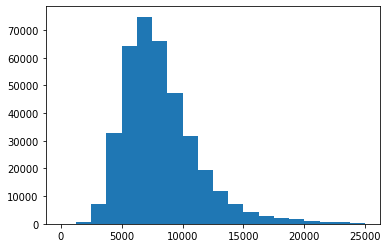

In [57]:
plt.hist(promo, bins = 20, range = (0,25000))
plt.show()

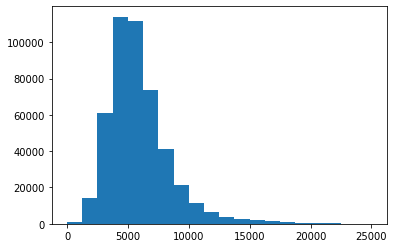

In [58]:
plt.hist(no_promo, bins = 20, range = (0,25000))
plt.show()

Just by looking at the distributions of both groups, we can see that the average of the promo group is higher than that of the no promo group. It seems that the average is around 7.5k for the promo group vs the 5k of the no promo group.

However, to be sure, we should test this hypothesis statistically by running a two-tailed independent samples t-test.

In [31]:
promo = df.Sales[df['Promo'] == 1]
len(promo)

376896

In [59]:
no_promo = df.Sales[df['Promo'] == 0]
len(no_promo)

629129

In [36]:
t, p = ttest_ind(promo, no_promo, equal_var = True)

print("t-statistic = " + str(t))
print("p-value = " + str(p))

t-statistic = 363.8446754265649
p-value = 0.0


In [66]:
print("The average daily sales where the store ran a promotion is " + str(np.mean(promo)))
print("The average daily sales where the store didn't run a promotion is " + str(np.mean(no_promo)))

The average daily sales where the store ran a promotion is 8228.281239386994
The average daily sales where the store didn't run a promotion is 4406.050805160786


**Note: p-value is 0.0 because it is too small to display, we can be sure that it is smaller than even 0.01**

Since the p-value is much less than 0.05, we reject the null hypothesis that the promo and no promo groups have the same average daily sales. More specifically, we see that on average the days where the stores ran a promotion made $4000 more than the days where they didn't run a promotion.

### Testing the average daily sales between the different store assortments using an one-way anova test

H_null: $\mu_{a}$ = $\mu_{b}$ = $\mu_{c}$

H_alt:  At least one of the average sales is different from the others

In [49]:
assortment_a = df.Sales[df['Assortment'] == 'a']
assortment_b = df.Sales[df['Assortment'] == 'b']
assortment_c = df.Sales[df['Assortment'] == 'c']

In [71]:
f_stat, p_val = f_oneway(assortment_a, assortment_b, assortment_c)

print("f-statistic = " + str(f_stat))
print("p-value = " + str(p_val))

f-statistic = 5057.065754982005
p-value = 0.0
The average daily sales of stores with assortment a is 5481.026095693513
The average daily sales of stores with assortment b is 8553.931999035447
The average daily sales of stores with assortment c is 6058.676566907757


Since the p-value is much less than 0.05, we reject the null hypothesis that the average daily sales of stores with different assortments are the same. More over, we see that:

In [72]:
print("The average daily sales of stores with assortment a is " + str(np.mean(assortment_a)))
print("The average daily sales of stores with assortment b is " + str(np.mean(assortment_b)))
print("The average daily sales of stores with assortment c is " + str(np.mean(assortment_c)))

The average daily sales of stores with assortment a is 5481.026095693513
The average daily sales of stores with assortment b is 8553.931999035447
The average daily sales of stores with assortment c is 6058.676566907757


### Testing the average daily sales between the different store types using an one-way anova test

H_null: $\mu_{a}$ = $\mu_{b}$ = $\mu_{c}$ = $\mu_{d}$

H_alt:  At least one of the average sales is different from the others

In [55]:
type_a = df.Sales[df['StoreType'] == 'a']
type_b = df.Sales[df['StoreType'] == 'b']
type_c = df.Sales[df['StoreType'] == 'c']
type_d = df.Sales[df['StoreType'] == 'd']

f_stat, p_val = f_oneway(type_a, type_b, type_c, type_d)

print("f-statistic = " + str(f_stat))
print("p-value = " + str(p_val))

f-statistic = 6817.192011836288
p-value = 0.0


Since the p-value is much less than 0.05, we reject the null hypothesis that the average daily sales of sdifferent types of stores are the same. More over, we see that:

In [73]:
print("The average daily sales of type a stores is " + str(np.mean(type_a)))
print("The average daily sales of type b stores is " + str(np.mean(type_b)))
print("The average daily sales of type c stores is " + str(np.mean(type_c)))
print("The average daily sales of type d stores is " + str(np.mean(type_d)))

The average daily sales of type a stores is 5738.179710202728
The average daily sales of type b stores is 10058.837334175616
The average daily sales of type c stores is 5723.6292458345515
The average daily sales of type d stores is 5641.819243109884
